In [ ]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/mushrooms.csv"
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Solucion

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.head() 

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Eliminar variable
df.drop(['veil_type'], axis=1, inplace=True)

In [ ]:
# Convertir 0-1 la variable y
import numpy as np
df['type'] = np.where((df['type'] == 'p'), 1, 0)
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


In [ ]:
# separar los datos en X y y
y = df['type']
X = df.drop(['type'], axis = 1)

In [ ]:
# One hot encoding

## copiar X en df2
df2 = X.copy()

oneHotEncoder = OneHotEncoder(categories="auto",drop='first',dtype=np.float64,handle_unknown="error")
oneHotEncoder.fit(X)
X = oneHotEncoder.transform(df2.values).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Escalar los datos

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [ ]:
X = standardScaler.fit_transform(X)
X

array([[-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.02219484,  1.2559503 , -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985,  2.96843295, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [ ]:
# Ajustar el modelo
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred = model.predict(X)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# Matriz de confusion
cm = confusion_matrix(
    y_true=y,
    y_pred=y_pred,
    labels=None,
    normalize=None,
)

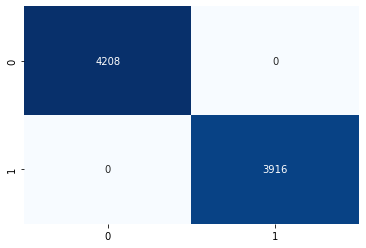

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.heatmap(
    cm,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()

In [ ]:
# # ---->>> Evaluación ---->>>
# # cm es la matriz de confusion
# print(cm[0][0] == 4208)
# print(cm[0][1] == 0)
# print(cm[1][0] == 0)
# print(cm[1][1] == 3916)